In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
import numpy as np

realtor_data = "Resources/Realtor Data.csv"
realtor_file_df = pd.read_csv(realtor_data, encoding="ISO-8859-1")
realtor_file_df
# data_types = realtor_file_df.dtypes
# data_types

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
...,...,...,...,...,...,...,...,...,...,...
1401061,for_sale,NaN,NaN,155.00,Perrysburg,New York,14129.0,NaN,NaN,325000.0
1401062,for_sale,4.0,2.0,0.36,Silver Creek,New York,14136.0,2026.0,2000-09-01,187900.0
1401063,for_sale,10.0,4.0,0.43,Brocton,New York,14716.0,4802.0,1994-12-01,120000.0
1401064,for_sale,2.0,2.0,0.14,Dunkirk,New York,14048.0,1568.0,2003-04-15,92000.0


In [3]:
realtor_file_df.duplicated().sum()

1249026

In [4]:
realtor_file_df.drop_duplicates()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
...,...,...,...,...,...,...,...,...,...,...
1401002,for_sale,3.0,2.0,0.22,Friendship,New York,14739.0,532.0,2004-06-22,118500.0
1401048,for_sale,1.0,1.0,0.25,Forestville,New York,14062.0,696.0,NaN,139000.0
1401058,for_sale,3.0,2.0,3.00,Gerry,New York,14740.0,1568.0,1999-12-27,189900.0
1401059,for_sale,5.0,2.0,0.55,Brocton,New York,14716.0,4260.0,NaN,95000.0


In [5]:
nan_df = realtor_file_df.isna().any(axis=1)
nan_df

0           True
1           True
2           True
3           True
4           True
           ...  
1401061     True
1401062    False
1401063    False
1401064    False
1401065    False
Length: 1401066, dtype: bool

In [6]:
realtor_file_df['prev_sold_encoded'] = realtor_file_df['prev_sold_date'].map(lambda x: 'Yes' if pd.notna(x) else 'No')
realtor_file_df

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,prev_sold_encoded
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0,No
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0,No
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0,No
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0,No
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0,No
...,...,...,...,...,...,...,...,...,...,...,...
1401061,for_sale,NaN,NaN,155.00,Perrysburg,New York,14129.0,NaN,NaN,325000.0,No
1401062,for_sale,4.0,2.0,0.36,Silver Creek,New York,14136.0,2026.0,2000-09-01,187900.0,Yes
1401063,for_sale,10.0,4.0,0.43,Brocton,New York,14716.0,4802.0,1994-12-01,120000.0,Yes
1401064,for_sale,2.0,2.0,0.14,Dunkirk,New York,14048.0,1568.0,2003-04-15,92000.0,Yes


In [7]:
realtor_file_df.fillna(0,inplace=True)


In [8]:
new_york_df = realtor_file_df[realtor_file_df['city'] == 'New York']
new_york_df

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,prev_sold_encoded
465089,for_sale,2.0,2.0,0.00,New York,New York,10021.0,0.0,0,1185000.0,No
465111,for_sale,12.0,14.0,0.00,New York,New York,10014.0,8528.0,0,29995000.0,No
465513,for_sale,2.0,2.0,0.00,New York,New York,10022.0,1425.0,0,895000.0,No
465515,for_sale,1.0,2.0,0.00,New York,New York,10005.0,1166.0,2014-01-10,985000.0,Yes
465516,for_sale,1.0,1.0,0.00,New York,New York,10065.0,761.0,2020-08-18,810000.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...
1117009,for_sale,0.0,1.0,0.00,New York,New York,11432.0,0.0,2015-04-09,150000.0,Yes
1117465,for_sale,4.0,3.0,0.00,New York,New York,11375.0,2200.0,2021-10-18,1825500.0,Yes
1117972,for_sale,1.0,1.0,0.00,New York,New York,11375.0,0.0,2006-09-13,350000.0,Yes
1118260,for_sale,4.0,3.0,0.00,New York,New York,11423.0,0.0,1987-06-12,990000.0,Yes


In [9]:
clean_df= new_york_df.describe().round(2)
clean_df

,bed,bath,acre_lot,zip_code,house_size,price
count,55543.00,55543.00,55543.00,55543.00,55543.00,5.554300e+04
mean,1.93,2.05,0.00,10138.49,945.68,2.612112e+06
std,1.61,1.54,0.01,356.29,1589.13,4.578766e+06
min,0.00,0.00,0.00,0.00,0.00,0.000000e+00
25%,1.00,1.00,0.00,10016.00,0.00,6.950000e+05
50%,2.00,2.00,0.00,10023.00,635.00,1.265000e+06
75%,3.00,3.00,0.00,10036.00,1312.00,2.725000e+06
max,40.00,45.00,0.36,14094.00,61839.00,1.350000e+08


In [10]:
clean_df.corr()

,bed,bath,acre_lot,zip_code,house_size,price
bed,1.000000,1.000000,1.000000,0.958649,0.606454,-0.156233
bath,1.000000,1.000000,1.000000,0.958663,0.606525,-0.156145
acre_lot,1.000000,1.000000,1.000000,0.958544,0.605914,-0.156903
zip_code,0.958649,0.958663,0.958544,1.000000,0.696498,-0.007438
house_size,0.606454,0.606525,0.605914,0.696498,1.000000,0.690572
price,-0.156233,-0.156145,-0.156903,-0.007438,0.690572,1.000000


<Axes: >

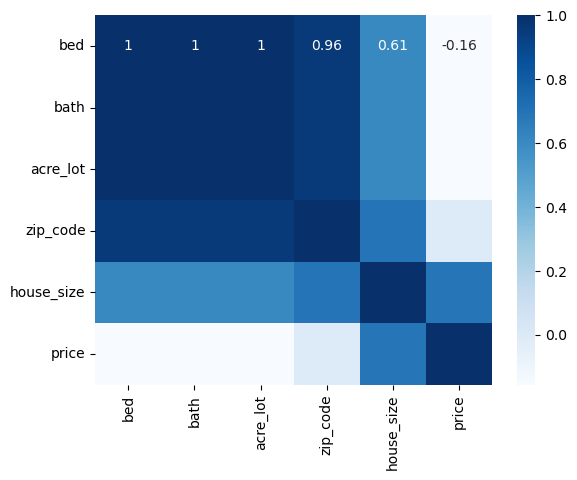

In [11]:
sns.heatmap(clean_df.corr(), annot=True, cmap="Blues")

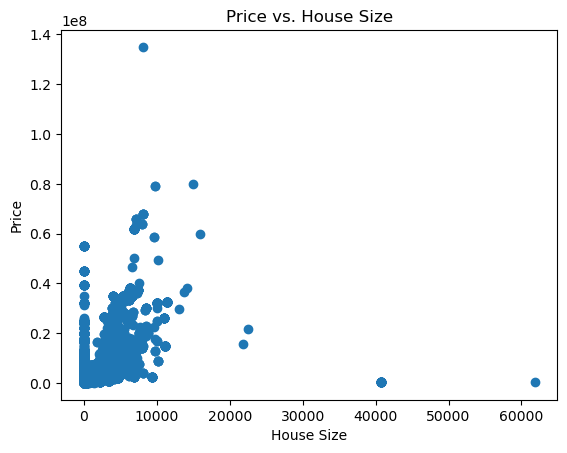

In [32]:
plt.scatter(new_york_df['house_size'], new_york_df['price'])
plt.xlabel('House Size')
plt.ylabel('Price')
plt.title('Price vs. House Size')
plt.show()

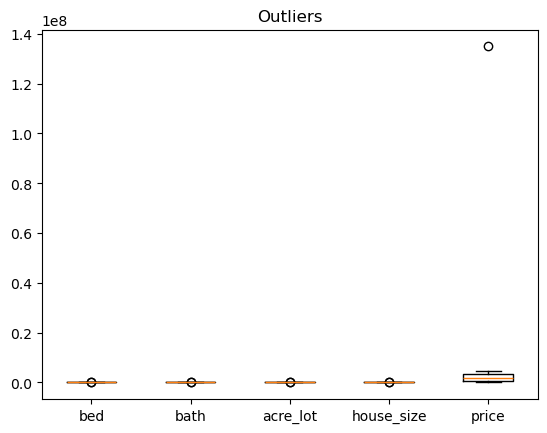

In [13]:
x_axis=['bed','bath','acre_lot','house_size','price']


plt.boxplot(clean_df[x_axis])
plt.xticks([1, 2, 3, 4, 5], x_axis)
plt.title('Outliers')
plt.show()

In [14]:
mean_numpy = np.mean(new_york_df["price"])
print(f"The mean price in NY is {mean_numpy}")

median_numpy = np.median(new_york_df["price"])
print(f"The median price in NY is {median_numpy}")

mode_scipy = st.mode(new_york_df["price"])
print(f"The mode price in NY is {mode_scipy}")

The mean price in NY is 2612111.8651495236
The median price in NY is 1265000.0
The mode price in NY is ModeResult(mode=995000.0, count=681)


In [15]:
print(st.normaltest(new_york_df["price"].sample(1000)))

NormaltestResult(statistic=981.5939635797849, pvalue=7.072599628461335e-214)


In [16]:
var_numpy = np.var(new_york_df["price"],ddof = 0)
print(f"The population variance using the NumPy module is {var_numpy}")

sd_numpy = np.std(new_york_df["price"],ddof = 0)
print(f"The population standard deviation using the NumPy module is {sd_numpy}")

The population variance using the NumPy module is 20964716425480.19
The population standard deviation using the NumPy module is 4578724.322939763


In [17]:
# Calculate the 68-95-99.7 rule using the standard deviation
print(f"Roughly 68% of the data is between {round(mean_numpy-sd_numpy,3)} and {round(mean_numpy+sd_numpy,3)}")
print(f"Roughly 95% of the data is between {round(mean_numpy-2*sd_numpy,3)} and {round(mean_numpy+2*sd_numpy,3)}")
print(f"Roughly 99.7% of the data is between {round(mean_numpy-3*sd_numpy,3)} and {round(mean_numpy+3*sd_numpy,3)}")

Roughly 68% of the data is between -1966612.458 and 7190836.188
Roughly 95% of the data is between -6545336.781 and 11769560.511
Roughly 99.7% of the data is between -11124061.104 and 16348284.834


In [18]:
z_scipy = st.zscore(new_york_df["price"])
print(f"The z-scores using the SciPy module are {z_scipy}")

The z-scores using the SciPy module are 465089    -0.311683
465111     5.980462
465513    -0.375020
465515    -0.355364
465516    -0.393584
             ...   
1117009   -0.537729
1117465   -0.171797
1117972   -0.494048
1118260   -0.354272
1398091   -0.544499
Name: price, Length: 55543, dtype: float64


In [19]:
quartiles = new_york_df["price"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of price is: {lowerq}")
print(f"The upper quartile of price is: {upperq}")
print(f"The interquartile range of price is: {iqr}")
print(f"The the median of price is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of price is: 695000.0
The upper quartile of price is: 2725000.0
The interquartile range of price is: 2030000.0
The the median of price is: 1265000.0 
Values below -2350000.0 could be outliers.
Values above 5770000.0 could be outliers.


In [55]:
# Extract month and quarter from the 'prev_sold_date' column
new_york_df.loc[:, 'month'] = new_york_df['prev_sold_date'].dt.month
new_york_df.loc[:, 'quarter'] = new_york_df['prev_sold_date'].dt.quarter

# Add a 'year' column
new_york_df.loc[:, 'year'] = new_york_df['prev_sold_date'].dt.year

# Determine the range of years in your dataset
min_year = new_york_df['year'].min()
max_year = new_york_df['year'].max()

# Filter data for the last three years
last_three_years_data = new_york_df[new_york_df['year'].between(new_york_df['year'].max() - 2, new_york_df['year'].max())]

# Group by month and calculate the average price for the last three years
average_prices_monthly_last_three_years = last_three_years_data.groupby('month')['price'].mean().round()

# Group by quarter and calculate the average price for the last three years
average_prices_quarterly_last_three_years = last_three_years_data.groupby('quarter')['price'].mean().round()

# Print the results
print("Average Monthly Prices (Last Three Years):")
print(average_prices_monthly_last_three_years)

print("\nAverage Quarterly Prices (Last Three Years):")
print(average_prices_quarterly_last_three_years)

Average Monthly Prices (Last Three Years):
month
1     8389860.0
2     1904344.0
3     1878235.0
4     2412079.0
5     1668546.0
6     1092585.0
7     5182380.0
8     1652141.0
9      956630.0
10    2251355.0
11    1341836.0
12    1610229.0
Name: price, dtype: float64

Average Quarterly Prices (Last Three Years):
quarter
1    3871500.0
2    1462681.0
3    3005037.0
4    1898847.0
Name: price, dtype: float64


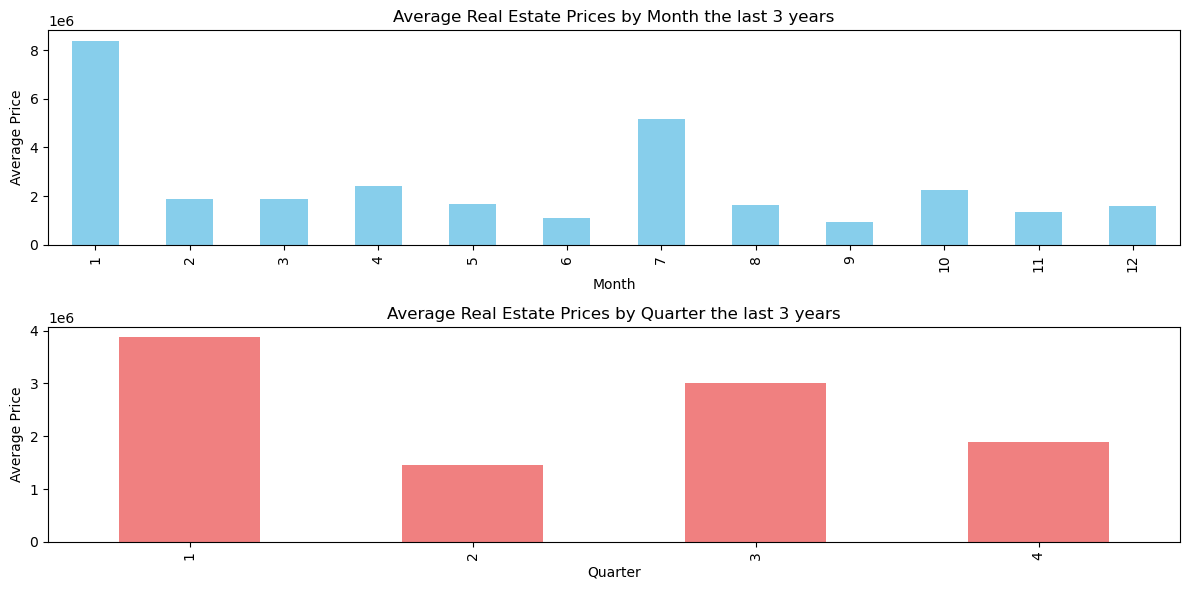

In [56]:
# Plotting
plt.figure(figsize=(12, 6))

# Plotting monthly average prices
plt.subplot(2, 1, 1)
average_prices_monthly_last_three_years.plot(kind='bar', color='skyblue')
plt.title('Average Real Estate Prices by Month the last 3 years')
plt.xlabel('Month')
plt.ylabel('Average Price')

# Plotting quarterly average prices
plt.subplot(2, 1, 2)
average_prices_quarterly_last_three_years.plot(kind='bar', color='lightcoral')
plt.title('Average Real Estate Prices by Quarter the last 3 years')
plt.xlabel('Quarter')
plt.ylabel('Average Price')

plt.tight_layout()
plt.show()


In [52]:
# Select data for the first month and first quarter in the last three years
first_month_data_last_three_years = last_three_years_data[last_three_years_data['month'] == 1]
first_quarter_data_last_three_years = last_three_years_data[last_three_years_data['quarter'] == 1]

# Calculate summary statistics for the first month in the last three years
summary_stats_first_month_last_three_years = first_month_data_last_three_years['price'].describe()

# Calculate summary statistics for the first quarter in the last three years
summary_stats_first_quarter_last_three_years = first_quarter_data_last_three_years['price'].describe()

# Display the summary statistics
print("Summary Statistics for the First Month in the Last Three Years:")
print(summary_stats_first_month_last_three_years)

print("\nSummary Statistics for the First Quarter in the Last Three Years:")
print(summary_stats_first_quarter_last_three_years)

Summary Statistics for the First Month in the Last Three Years:
count    2.000000e+02
mean     8.389860e+06
std      1.284571e+07
min      3.900000e+05
25%      9.600000e+05
50%      1.495000e+06
75%      5.999000e+06
max      3.500000e+07
Name: price, dtype: float64

Summary Statistics for the First Quarter in the Last Three Years:
count    6.550000e+02
mean     3.871500e+06
std      7.886557e+06
min      2.890000e+05
25%      7.390000e+05
50%      1.295000e+06
75%      2.598000e+06
max      3.500000e+07
Name: price, dtype: float64


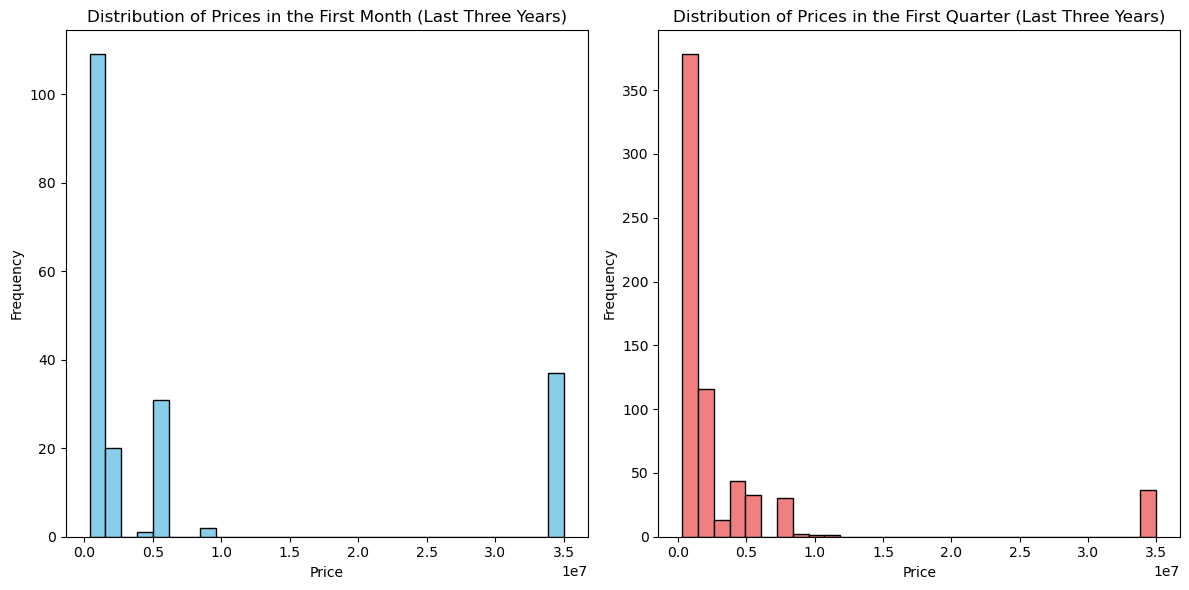

In [53]:
# Plot histograms for the distribution of prices in the last three years
plt.figure(figsize=(12, 6))

# Histogram for the first month in the last three years
plt.subplot(1, 2, 1)
plt.hist(first_month_data_last_three_years['price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Prices in the First Month (Last Three Years)')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Histogram for the first quarter in the last three years
plt.subplot(1, 2, 2)
plt.hist(first_quarter_data_last_three_years['price'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Distribution of Prices in the First Quarter (Last Three Years)')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

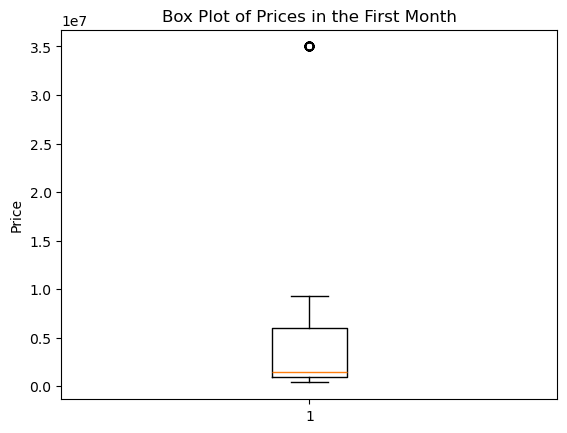

In [54]:
plt.boxplot(first_month_data_last_three_years['price'])
plt.title('Box Plot of Prices in the First Month')
plt.ylabel('Price')
plt.show()